In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#  Introduction
## Polynomial Fitting

Suppose we have dataset $\mathcal{D} = \{(x_i, y_i), i = 1, 2, \cdots, n\}$, If we want to predict $\hat{y}$ from a new sample $\hat{x}$, one of the most basic method is to use these data to fit a polynomial curve $$y = f(x) = \sum_{i = 1}^{N} w_i x^i$$ with $\mathcal{D}$.

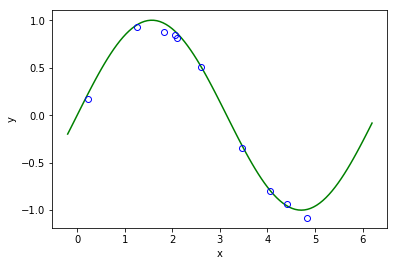

In [2]:
x = np.linspace(-0.2, 6.2, 100)
xd = 6 * np.random.random(size=10)
noise = 0.1 * (2 * np.random.random(size = 10) - 1.0)
y = np.sin(x)
plt.plot(x, y, 'g')
plt.plot(xd, np.sin(xd) + noise, 'bo', markerfacecolor='None')
plt.xlabel('x')
plt.ylabel('y')

In order to fit a curve, our goal is to minimize **error function**
$$E(\mathbf{w}) = \frac{1}{2}\sum_{n = 1}^N \{f(x_n, \mathbf{w}) - y_n\}^{2}$$

### **Overfitting** 
More parameters give a function stronger ability to fit data, however, by getting too large, the function behaves good on **test dataset** but poor on **validation dataset**.

There are several methods to mitigate overfitting:
* Provide more data, larger dataset can be used to train models that are more complicated
* **Regularization**: Add a regularization term to punish parameters being too large, which makes the error function looks like: $$\tilde{E}(\mathbf{w}) = \frac{1}{2}\sum_{n = 1}^N\{f(x_n, \mathbf{w}) - y_n\}^2 + \frac{\lambda}{2} ||\mathbf{w}||^2 $$
in which $\lambda$ is a **hyperparameter** that we have to tune, if $\lambda$ is too large, the parameters $\mathbf{w}$ will be too small to fit the data.

## Probability Theory

**Joint Probability:** $$p(X = x_i, Y = y_i) = \frac{n_{ij}}{N}$$, in which $N = \sum_{i, j} n_{ij}$

So, we have $$p(X = x_i) = \sum_j n_{ij} / N = \sum_{j = 1}^L p(X = x_i, Y = y_j)$$

And we finally get:
* **Product Rule:** $p(X, Y) = p(Y \mid X)p(X)$
* **Sum Rule:** $p(X) = \sum_{Y}p(X, Y)$

From product rule and $p(X, Y) = p(Y, X)$, we have

**Bayes' Theorem**: $$p(Y \mid X) = \frac{p(X \mid Y)p(Y)}{p(X)}$$

### Probability Density
**Probability Density:** $$p(x \in (a, b)) = \int_a^b p(x)dx$$
which satisfy the following conditions:
* $p(x) \geq 0$
* $\int_{-\infty}^{\infty} p(x)dx = 1$

And $p_y(y) = p_x(x)\left|\frac{dx}{dy}\right| = p_x(g(y))|g'(y)|$

**Cumulative distrubution function:** $$P(z) = \int^z_{-\infty} p(x)dx$$

### Expectation and Covariance
**Expectation:** 
* $\mathbb{E}[f] = \sum_{x} p(x)f(x)$ if $p(x)$ is discrete distribution
* $\mathbb{E}[f] = \int p(x)f(x)dx$ if $p(x)$ is continuous distribution

and we can approximate it by
$$\mathbb{E}[f] \simeq \frac{1}{N}\sum_{n = 1}^N f(x_n)$$

**Conditional Expectation:**
$$\mathbb{E}_x[f \mid y] = \sum_{x}p(x \mid y)f(x)$$

**Variance:**
$$\mathrm{var}[f] = \mathbb{E}[(f(x) - \mathbb{E}[f(x)])^2] = \mathbb{E}[f(x)^2] - \mathbb{E}[f(x)]^2$$

**Covariance:**
$$\mathrm{cov}[x, y] = \mathbb{E}_{x, y}[\{x - \mathbb{E}[x]\}\{y - \mathbb{E}[y]\}] =  \mathbb{E}_{x, y}[xy] -  \mathbb{E}[x]\mathbb{E}[y]$$

and 
$$\mathrm{cov}[\mathbf{x}, \mathbf{y}] = \mathbb{E}_{\mathbf{x}, \mathbf{y}}[\{\mathbf{x} - \mathbb{E}[\mathbf{x}]\}\{\mathbf{y}^T - \mathbb{E}[\mathbf{y}]\}] =  \mathbb{E}_{x, y}[\mathbf{xy}^T] -  \mathbb{E}[\mathbf{x}]\mathbb{E}[\mathbf{y}^T]$$

if $\mathbf{x, y}$ are vectors

### Beyasian Probability

If we have a dataset $\mathcal{D}$ and a set of parameters $\mathbf{w}$ that are interdependent, then by Bayes' Theorem, we have
$$p(\mathbf{w} \mid \mathcal{D}) = \frac{p(\mathcal{D} \mid \mathbf{w})p(\mathbf{w})}{p(\mathcal{D})}$$

We call $p(\mathcal{D} \mid \mathbf{w})$ the likelihood function, Maximum Likelihood Approximation requires us to approximate $\mathbf{w}$ that maximize likelihood function.

Consider Gaussian distribution
$$\mathcal{N}(x \mid \mu, \sigma^2) = \frac{1}{(2\pi\sigma^2)^{\frac{1}{2}}} \exp\{-\frac{1}{2\sigma^2}(x - \mu)^2\}$$

or

$$\mathcal{N}(\mathbf{x} \mid \mu, \sigma^2) = \frac{1}{(2\pi)^{\frac{D}{2}}} \frac{1}{|\Sigma|^{\frac{1}{2}}} \exp\{-\frac{1}{2\sigma^2}(\mathbf{x} - \mu)^T\Sigma^{-1} (\mathbf{x} - \mu)\}$$

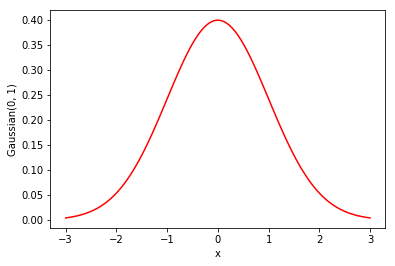

In [3]:
x_gaussian = np.linspace(-3, 3, 100)
def gaussian(x, mu, sigma):
    return (1/np.sqrt(2 * np.pi * sigma ** 2)) * np.exp(-1 * (1 / (2 * sigma ** 2)) * (x - mu) ** 2)
y_gaussian = gaussian(x_gaussian, 0, 1.0)
plt.plot(x_gaussian, y_gaussian, 'r')
plt.xlabel('x')
plt.ylabel('Gaussian(0, 1)')

In order to maximize $$p(\mathbf{x} \mid \mu, \sigma^2) = \prod_{n = 1}^{N}\mathcal{N}(x \mid \mu, \sigma^2) = \prod_{n = 1}^{N}\frac{1}{(2\pi\sigma^2)^{\frac{1}{2}}} \exp\{-\frac{1}{2\sigma^2}(x - \mu)^2\}$$ we can maximize log likelihood function $$\ln \mathcal{N}(x \mid \mu, \sigma^2) = -\frac{1}{2\sigma^2} \sum_{n = 1}^{N}(x_n - \mu)^2 - \frac{N}{2} \ln \sigma^2 - \ln (2\pi)$$

We want to solve $$\frac{\partial \mathcal{N}(x \mid \mu, \sigma^2)}{\partial \mu} = 0 \Rightarrow \mu_{ML} = \frac{1}{N} \sum_{n = 1}^{N} x_n$$

and 

$$\frac{\partial \mathcal{N}(x \mid \mu, \sigma^2)}{\partial \sigma^2} = 0 \Rightarrow \sigma^2_{ML} = \frac{1}{N}\sum_{n = 1}^{N}(x_n - \mu_{ML})^2$$

There are flaws in maximum likelihood approximation, one of which is called **bias**, which means systematically underestimation of the variance.

It is easy to prove that

$$\mathbb{E}[\mu_{ML}] = \mu$$

and 

$$\mathbb{E}[\sigma^2_{ML}] = \frac{N - 1}{N}\sigma^2$$

This means that when $N$ gets large enough, the bias is not a serious problem, but as the number of parameters increase, bias is still a very serious problem.

### Consider curve fitting by using probability
Suppose for any $x$, $y$ follows gaussian distribution of $\mu = f(x, w)$, then
$$p(y \mid x, w, \beta) = \mathcal{N}(t \mid f(x, w, \beta^{-1}))$$

so we have likelihood function to be $$p(y \mid x, w, \beta) = \prod_{n = 1}^N \mathcal{N}(y_n \mid f(x_n, w), \beta^{-1})$$

This gives us the log likelihood function $$\ln p(y \mid x, w, \beta) = -\frac{\beta}{2} \sum_{n = 1}^{N} \{f(x_n, w) - y_n\}^2 + \frac{N}{2} \ln \beta - \frac{N}{2} \ln (2\pi)$$

Then maximize likelihood function is equivalent to minimize 
$$E(w) = \frac{1}{2}\sum_{n = 1}^N \{f(x_n, w) - y_n\}^2$$

Then we consider the prior distribution of $\mathbf{w}$ follows $$p(\mathbf{w \mid \alpha}) = \mathcal{N}(\mathbf{w} \mid \mathbf{0}, \alpha^{-1}\mathbf{I}) = (\frac{\alpha}{2\pi})^{\frac{M + 1}{2}} \exp\{-\frac{\alpha}{2}\mathbf{w}^T\mathbf{w}\}$$ 

By Bayes' Theorem, we have that
\begin{align}
    &p(\mathbf{w} \mid \mathbf{x}, \mathbf{y},\alpha,\beta) \propto p(\mathbf{y} \mid \mathbf{x}, \mathbf{w},\beta)p(w \mid \alpha)\nonumber\\
    &\phantom{p(\mathbf{w} \mid \mathbf{x}, \mathbf{y},\alpha,\beta)} = (\prod_{n = 1}^N \mathcal{N}(y_n \mid f(x_n, w), \beta^{-1}))((\frac{\alpha}{2\pi})^{\frac{M + 1}{2}} \exp\{-\frac{\alpha}{2}\mathbf{w}^T\mathbf{w})
\end{align}

So we can maximize
$$\ln p(\mathbf{w} \mid \mathbf{x}, \mathbf{y},\alpha,\beta) = -\frac{\beta}{2} \sum_{n = 1}^{N} \{f(x_n, w) - y_n\}^2 + \frac{N}{2} \ln \beta - \frac{N}{2} \ln (2\pi) + \frac{M + 1}{2} \frac{\alpha}{2\pi} - \frac{\alpha}{2}w^T w$$

which is equavalent to minimize
$$\tilde{E}(w, \lambda) = \frac{1}{2} \sum_{n = 1}^{N} \{f(x_n, w) - y_n\}^2 + \frac{\lambda}{2}w^Tw, \lambda = \frac{\alpha}{\beta}$$

which gives us the regularization term.

## Curse of Dimension
Sometimes we will have to deal with multiple features which makes the input space a high-demension space. As a result, the parameters needed increase rapidly. For a m-order polynomial, the growth in the number of coefficients is like $D^M$.

Also consider a circle in high-dimensional space, there is 
$$\frac{V_D(1) - V_D(1 - \varepsilon)}{V_D(1)} = 1 - (1 - \varepsilon)^D$$

which means that in high-dimensional space, the volume of a sphere is concentrated in a thin shell near the surface.

(0, 1)

(0, 1)

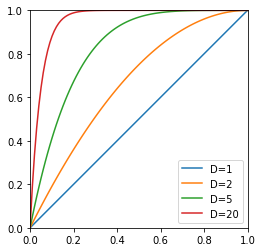

In [4]:
x_dimension = np.linspace(0, 1, 100)
ys = [1 - (1 - x_dimension)** i for i in [1, 2, 5, 20]]
for y, i in zip(ys, [1, 2, 5, 20]):
    plt.plot(x_dimension, y, label='D=' + str(i))
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axes().set_aspect('equal')

## Informational Theory

**Amount of Information:**
    The amount of information $h(x)$ needs to satisfy the following requirements:
* $h(x)$ is a monotonic function of $p(x)$
* $h(x, y) = h(x)  + h(y)$ if two events are independent
* $h(x) \geq 0$

So we get that $h(x) = -\log_2 p(x)$

And **entropy**: $H[x] = \mathbb{E}[h] = -\sum_x p(x)\log_2 p(x)$

**Noiseless Coding Theorem:** Entropy is the lower bound of the number of bits needed to transmit a random variable.

**Differential entropy:** $H[\mathbf{x}] = -\int p(\mathbf{x}) \ln p(\mathbf{x})d\mathbf{x}$

$H[\mathbf{x, y}] = H[\mathbf{y} \mid \mathbf{x}] + H[\mathbf{x}]$

**Relative Entropy(KL Divergence):** 
$$\mathrm{KL}(p || q) = -\int p(x)\ln \left\{\frac{q(x)}{p(x)}\right\}dx$$

Note: $\mathrm{KL}(p \| q) \neq \mathrm{KL}(q \| p)$